In [ ]:
pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 14.5 MB/s 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer 
import xgboost as xgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [ ]:
data = load_breast_cancer() 

df = pd.DataFrame(data.data, columns=data.feature_names) 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target'] = data.target 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
Y = df['target'].to_frame() 
X = df[df.columns.difference(['target'])] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42) 

In [ ]:
# Build XGBoost model 

xgb_model = xgb.XGBClassifier(random_state=42, gpu_id=0) 
xgb_model.fit(X_train, Y_train.values.ravel()) 
y_pred = xgb_model.predict(X_test) 

accuracy = accuracy_score(y_pred, Y_test) 

print("Accuracy:", accuracy*100)

Accuracy: 95.6140350877193


In [ ]:
# SHAP 
import shap 

explainer = shap.TreeExplainer(xgb_model) 

shap_values = explainer.shap_values(X) 

expected_value = explainer.expected_value 

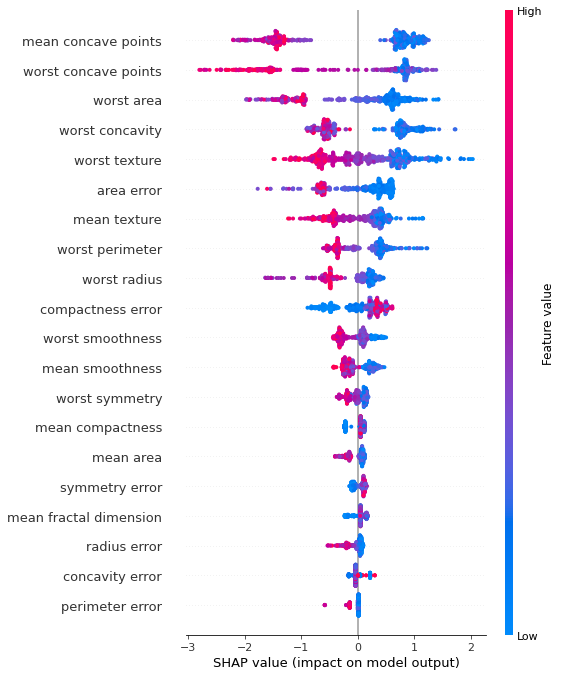

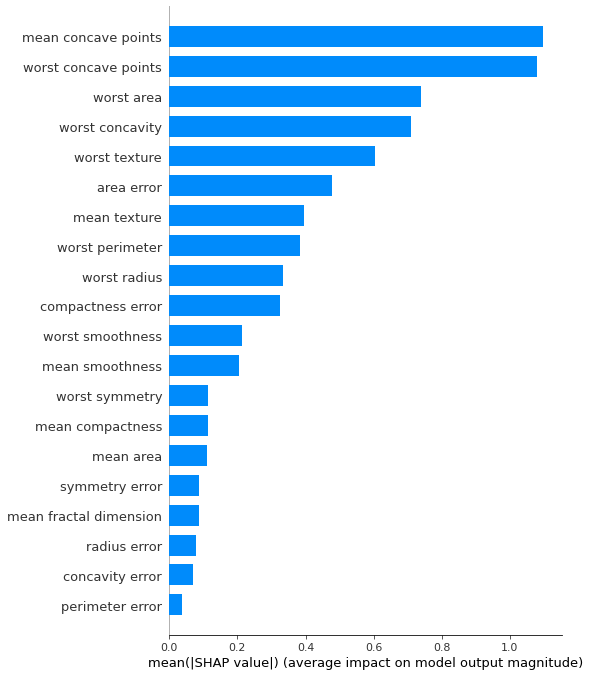

In [ ]:
# SUMMARY PLOTS 

shap.summary_plot(shap_values, X, title="SHAP SUMMARY DOT PLOT") 

shap.summary_plot(shap_values, X, plot_type="bar", title="SHAP SUMMARY BAR PLOT") 

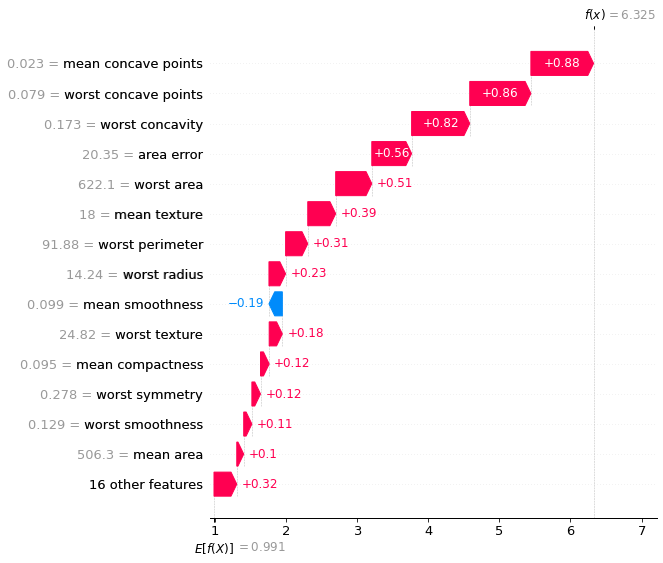

In [ ]:
# Waterfall plot 

shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.iloc[79, :], feature_names=X.columns, max_display=15, show=True)

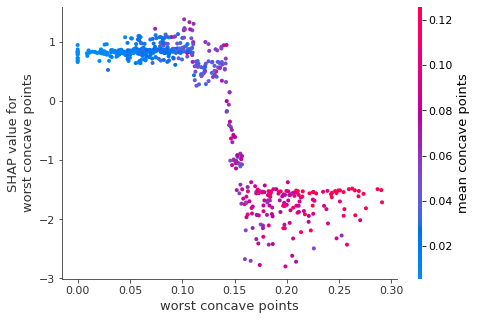

In [ ]:
# Dependence Plot 

shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

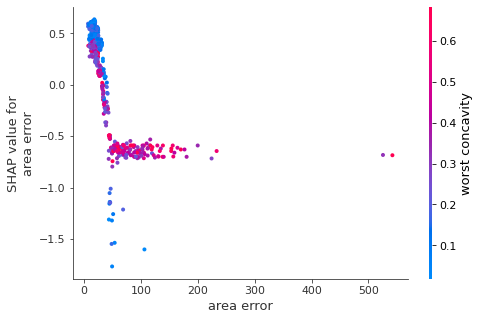

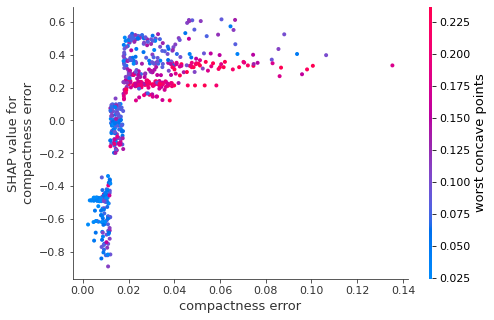

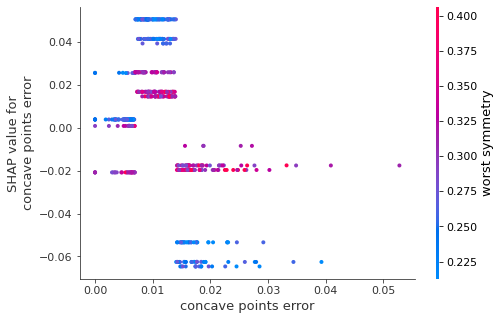

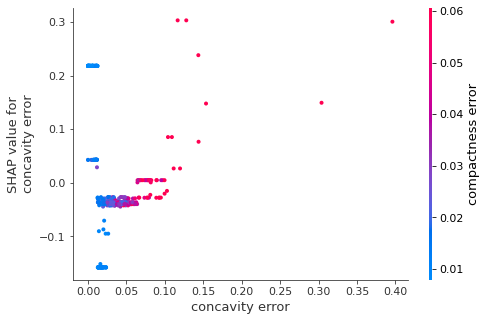

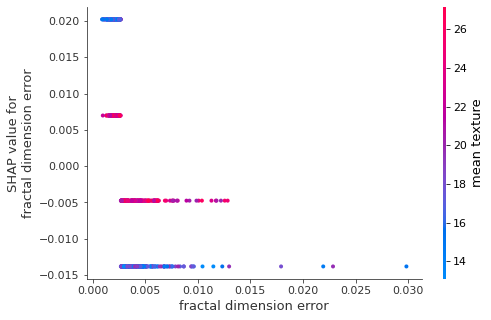

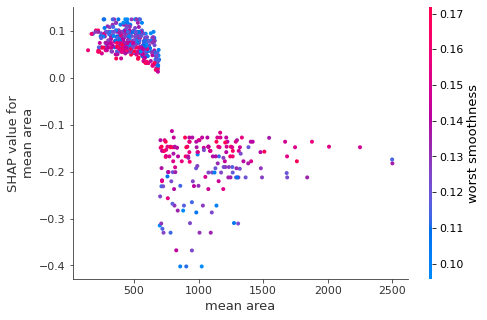

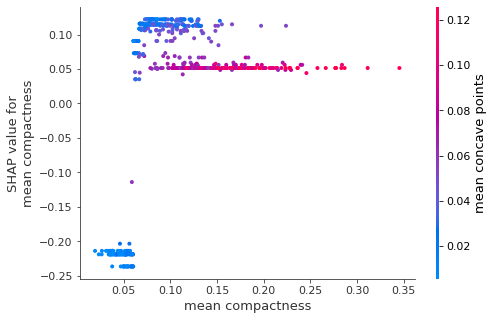

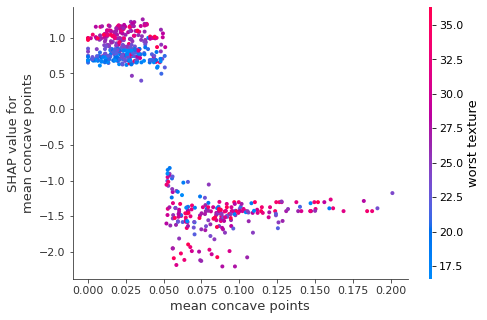

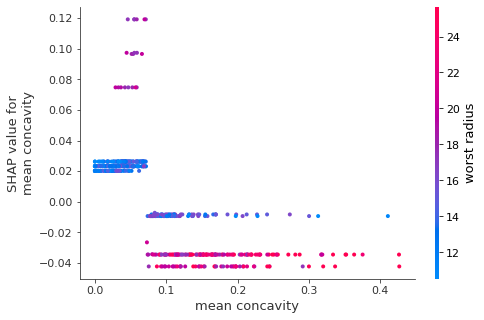

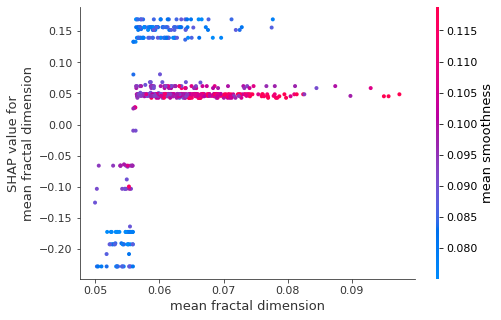

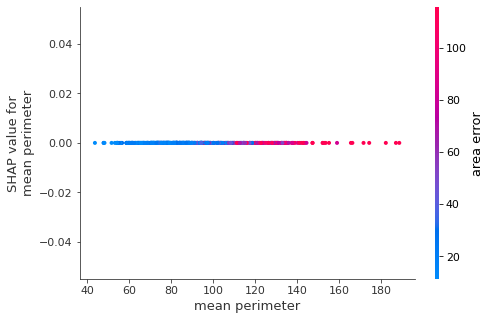

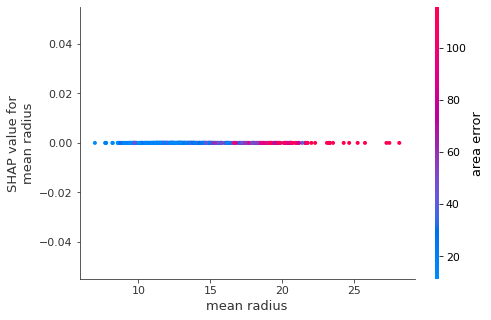

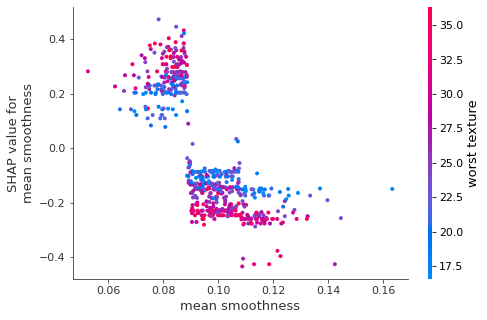

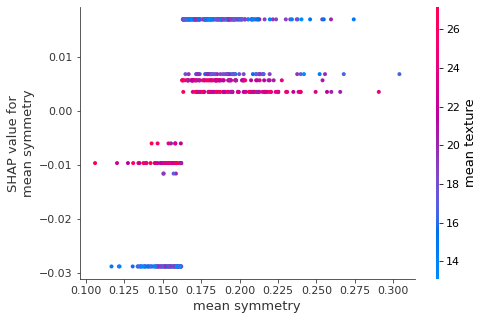

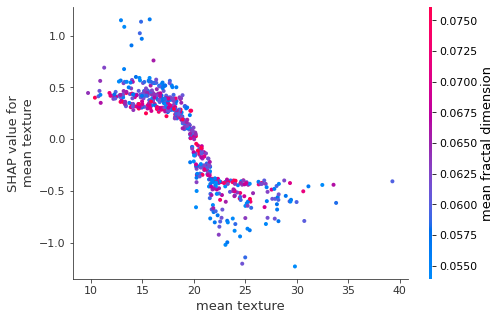

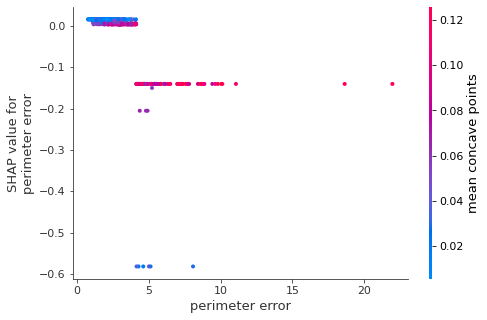

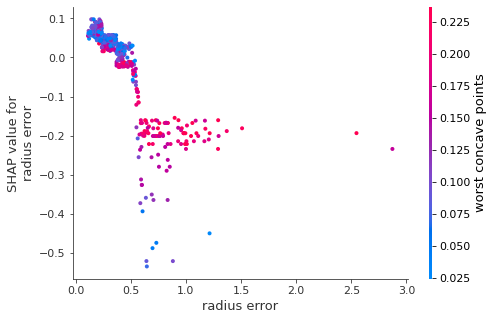

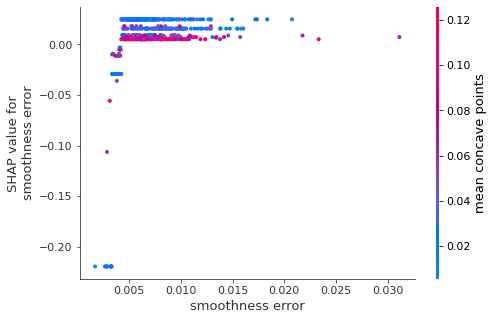

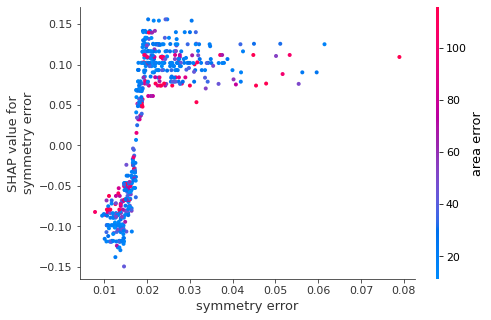

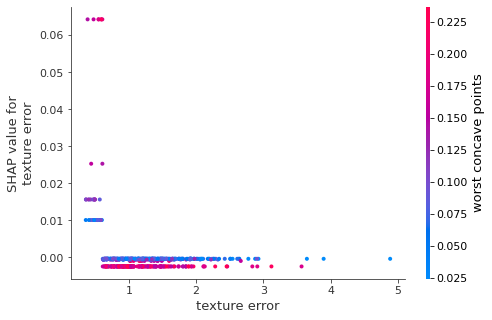

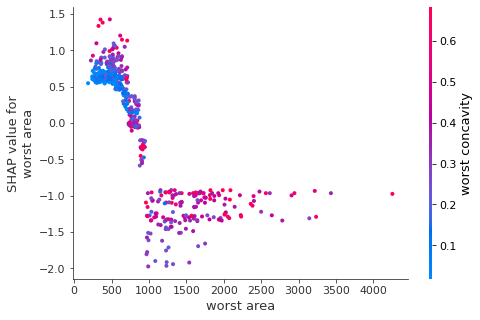

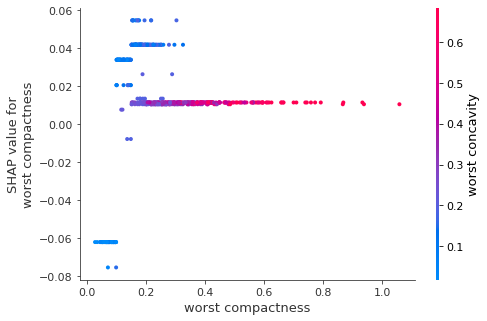

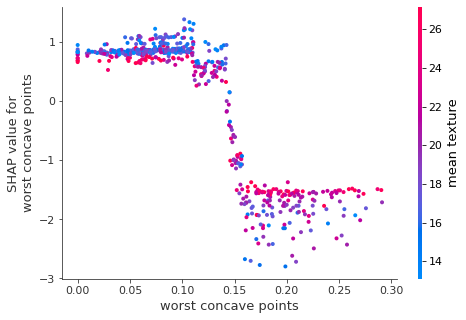

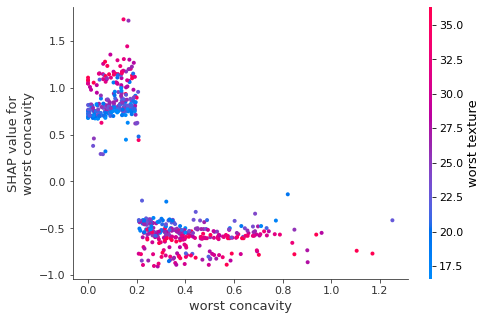

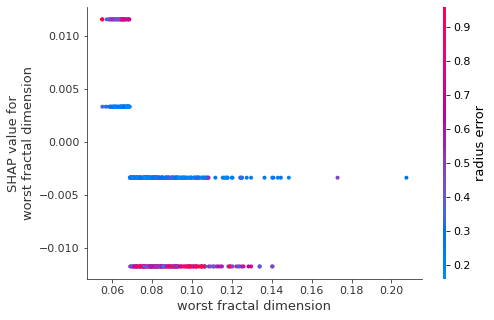

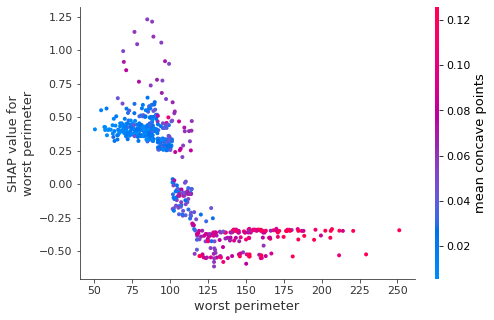

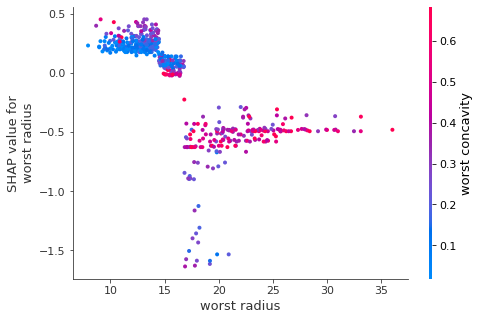

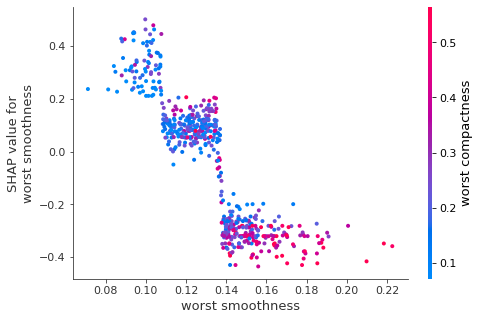

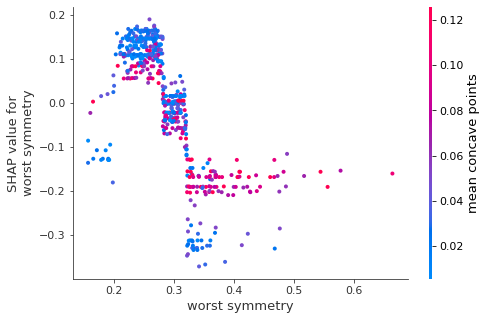

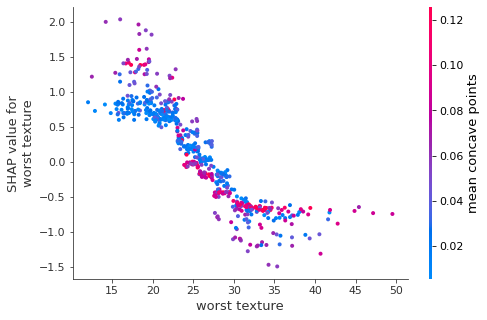

In [ ]:
# Multiple Dependence plots 

for i in X_train.columns: 
  shap.dependence_plot(i, shap_values, X)

In [ ]:
shap.initjs()
# Force plot - multiple rows 

shap.force_plot(explainer.expected_value, shap_values[:100, :], X.iloc[:100, :]) 

# Force plot - Single row 

shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

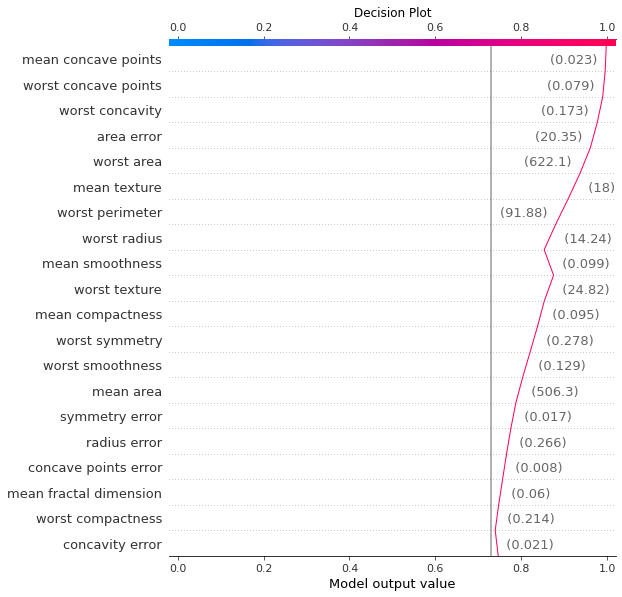

In [ ]:
# Decision Plot 
shap.decision_plot(expected_value, shap_values[79], features=X.iloc[79, :], feature_names=(X.columns.tolist()), link="logit", show=True, title="Decision Plot") 

**Q. explain how the use of that particular XAI technique helped in making the model more explainable.** 

SHAP is based on Shapley value, a method to calculate the contributions of each feature to the model's prediction.
The Shapley value is calculated with all possible combinations of features. Given N players, it has to calculate outcomes for 2^N combinations of features. Calculating the contribution of each feature is not feasible for large numbers of N. For example, for images, N is the number of pixels. 
Therefore, SHAP does not attempt to calculate the actual Shapley value. Instead, it uses sampling and approximations to calculate the SHAP value.